In [3]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [72]:
tr = pd.read_csv('/Users/antirrabia/Documents/01-GitHub/DataMining-_-/CSV/HousePrices/train.csv', index_col='Id')
te = pd.read_csv('/Users/antirrabia/Documents/01-GitHub/DataMining-_-/CSV/HousePrices/test.csv', index_col='Id')

### Columns by types

In [ ]:
# 25 columns
ordinal_col = ['FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 'ExterQual', 'ExterCond', 
               'BsmtQual', 'BsmtCond', 'PoolQC', 'HeatingQC', 'KitchenQual', 'BsmtExposure', 'Functional', 
               'GarageFinish', 'Fence', 'CentralAir', 'PavedDrive', 'Street', 'Alley', 'LandSlope', 'LotShape', 
               'HouseStyle', 'OverallQual', 'OverallCond']

In [ ]:
# 20 columns
# features engenering
# 'PeakMonths', 'Finished', 'Splited', 'Neighborhood_Cluster', 'MSSubClass_Cluster',

nominal_col = ['Condition1', 'RoofStyle', 'Foundation', 'GarageType', 'SaleType', 'SaleCondition', 'Exterior1st', 
              'Exterior2nd', 'LotConfig', 'LandContour', 'Condition2', 'RoofMatl', 'Heating', 'Electrical', 
              'MiscFeature', 'MoSold', 'YrSold', 'BldgType', 'MSZoning', 'MasVnrType']

In [1]:
# 32 columns
# feature engeneering
# , 'TotalSF'
num_col = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
 'BsmtFinSF2', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

In [ ]:
# Cicly features
'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd',

In [2]:
num_col[:7]

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF']

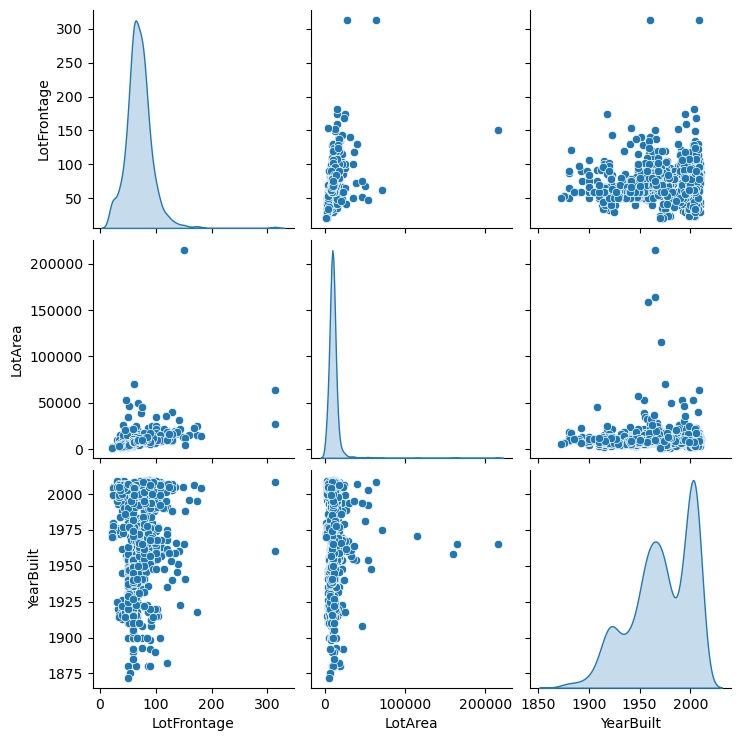

In [13]:
sns.pairplot(tr[num_col[:3]], diag_kind='kde');
plt.show()

In [56]:
corr = tr[num_col].corr().abs()

In [65]:
def corr_pair(df, cols, threshold = 0.7):
    '''
    function that calculate the corrolation of features
    and filtering just unique pairs 
    '''

    corr = df[cols].corr().abs()

    # creating a matrix same size matrix as 'tr'
    # [1 1 1]
    # [1 1 1]
    # [1 1 1]
    temp_matrix = np.ones(corr.shape)

    # selecting the upper triagle of the matrix
    # excluting the diagonal
    # [0 1 1]
    # [0 0 1]
    # [0 0 0]
    upper_tri = np.triu(temp_matrix, k=1)

    # converting to booleans
    # [FALSE TRUE TRUE]
    # [FALSE FLASE TRUE]
    # [FALSE FALSE FALSE]
    uppper_tri_bool = upper_tri.astype( bool )

    # filterin the corroletion matrix
    upper_corr = corr.where( uppper_tri_bool )

    unique_corr_pair = upper_corr.unstack().dropna()
    sorted_pairs = unique_corr_pair.sort_values(ascending=False)

    return sorted_pairs[ sorted_pairs > threshold ].copy()

In [58]:
unique_corr_pair = upper_corr.unstack().dropna()
sorted_pairs = unique_corr_pair.sort_values(ascending=False)

In [59]:
sorted_pairs[ sorted_pairs>0.7 ]

GarageArea    GarageCars     0.882475
GarageYrBlt   YearBuilt      0.825667
TotRmsAbvGrd  GrLivArea      0.825489
1stFlrSF      TotalBsmtSF    0.819530
SalePrice     GrLivArea      0.708624
dtype: float64

In [27]:
len(num_col)

32

In [64]:
temp = corr_pair(tr.copy(), num_col)
temp

GarageArea    GarageCars     0.882475
GarageYrBlt   YearBuilt      0.825667
TotRmsAbvGrd  GrLivArea      0.825489
1stFlrSF      TotalBsmtSF    0.819530
SalePrice     GrLivArea      0.708624
dtype: float64

In [66]:
tr.tail(7)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [73]:
te.head(7)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
